# Etude occurence


In [12]:
import os
import re
import csv
from collections import Counter
from nltk.corpus import stopwords
from unidecode import unidecode  # Pour enlever les accents

# Charger les stopwords en français
nltk_stopwords = set(stopwords.words('french') + [
    "alors", "au", "aucuns", "aussi", "autre", "avant", "avec", "avoir", "bon", "car", "ce", "cela", "ces", "ceux", 
    "chaque", "ci", "comme", "comment", "dans", "des", "du", "dedans", "dehors", "depuis", "devrait", "doit", "donc", 
    "dos", "début", "elle", "elles", "en", "encore", "essai", "est", "et", "eu", "fait", "faites", "fois", "font", 
    "hors", "ici", "il", "ils", "je", "juste", "la", "le", "les", "leur", "là", "ma", "maintenant", "mais", "mes", 
    "mine", "moins", "mon", "mot", "même", "ni", "nommés", "notre", "nous", "nouveaux", "ou", "où", "par", "parce", 
    "pas", "peut", "peu", "plupart", "pour", "pourquoi", "quand", "que", "quel", "quelle", "quelles", "quels", "qui", 
    "sa", "sans", "ses", "seulement", "si", "sien", "son", "sont", "sous", "soyez", "sujet", "sur", "ta", "tandis", 
    "tellement", "tels", "tes", "ton", "tous", "tout", "trop", "très", "tu", "valeur", "voie", "voient", "vont", 
    "votre", "vous", "vu", "ça", "étaient", "état", "étions", "été", "être", "de", "a", "4", "-", "une", "plus","7", 
    "un", "se", "'", "_",'‘', 'ne', "cette", "bien", "toujours", "si", "aussi", "peu", "deux", "trois", "quatre", 
    "cinq", "nature", "faire", "faut", "peut", "doit", "doivent", "peuvent", "chez", "méme", "soit", "dont", "non", 
    "tous", "toutes", "toute", "c’est", "dune", "d’une", "tant", "ainsi", "cest", "surtout", "étre", "pourtant", 
    "souvent", "trés", "leurs", "quelques", " ", "pendant", "aprés", "autres", "ment", "celle", "beaucoup"
])

def process_word(word, all_words_in_text):
    """
    Si le mot finit par 's', vérifie si la version sans 's' existe dans
    la liste des mots du fichier texte.
    """
    # Supprimer les accents
    word = unidecode(word)
    
    # Si le mot finit par 's', vérifier la validité du mot sans le 's'
    if word.endswith('s'):
        singular_form = word[:-1]
        if singular_form in all_words_in_text:
            return singular_form
    
    # Retourner le mot tel quel sinon
    return word

def count_words_and_generate_csv(folder_path, output_path):
    # Explorer les sous-dossiers
    for root, dirs, files in os.walk(folder_path):
        # Compteur pour chaque sous-dossier
        subfolder_counter = Counter()

        # Filtrer les fichiers texte dans le sous-dossier
        text_files = [file for file in files if file.endswith(".txt")]

        if text_files:  # S'il y a des fichiers texte dans le dossier
            subfolder_name = os.path.basename(root)

            for file in text_files:
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    # Lire et traiter le contenu du fichier
                    text = f.read().lower()
                    
                    # Tokenisation simple : mots de 4 caractères ou plus
                    words = re.findall(r'\b\w{4,}\b', text)
                    
                    # Supprimer les accents des mots du texte
                    all_words_in_text = set(unidecode(w) for w in words)
                    
                    # Appliquer les transformations aux mots
                    processed_words = [
                        process_word(word, all_words_in_text) 
                        for word in words 
                        if word not in nltk_stopwords
                    ]
                    
                    # Mettre à jour le compteur du sous-dossier
                    subfolder_counter.update(processed_words)

            # Sauvegarder les résultats dans un fichier CSV
            output_csv = os.path.join(output_path, f"{subfolder_name}_occurrences.csv")
            if not os.path.exists(output_path):
                os.makedirs(output_path)
            with open(output_csv, 'w', encoding='utf-8', newline='') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow(['Mot', 'Occurences'])
                for word, count in subfolder_counter.most_common():
                    writer.writerow([word, count])

            print(f"Fichier CSV généré : {output_csv}")



In [14]:
folder_path = "../data/txt/ouvrages_feminins"
output_csv = "../data/occurences/ouvrages_feminins"

count_words_and_generate_csv(folder_path, output_csv)

Fichier CSV généré : ../data/occurences/ouvrages_feminins/25_Les_do_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/04_Conque_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/19_La_fem_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/02_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/21_Le_Bé_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/06_Conque_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/03_Commen_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/20_part2_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/20_part5_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/20_part4_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/20_part3_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_feminins/11_occurrences.csv
Fichier CS

In [15]:
folder_path = "../data/txt/ouvrages_masculins"
output_csv = "../data/occurences/ouvrages_masculins"

count_words_and_generate_csv(folder_path, output_csv)

Fichier CSV généré : ../data/occurences/ouvrages_masculins/27_L'hygi_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/34_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/29_L'hygi_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/41_Petit__occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/18_Hygiè_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/32_La_gym_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/05_Consei_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/01_Biblio_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/15_Histoi_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/20_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/11_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_masculins/40_Médec_occurrences.csv
Fic

In [20]:
folder_path = "../data/txt/ouvrages_mixtes"
output_csv = "../data/occurences/ouvrages_mixtes"

count_words_and_generate_csv(folder_path, output_csv)

Fichier CSV généré : ../data/occurences/ouvrages_mixtes/03_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_mixtes/02_occurrences.csv
Fichier CSV généré : ../data/occurences/ouvrages_mixtes/01_occurrences.csv


In [ ]:
folder_path = "../data/txt/txt_merged"
output_csv = "../data/occurences/txt_merged"

count_words_and_generate_csv(folder_path, output_csv)

Fichier CSV généré : ../data/occurences/txt_merged/mixtes_occurrences.csv
Fichier CSV généré : ../data/occurences/txt_merged/masculins_occurrences.csv
Fichier CSV généré : ../data/occurences/txt_merged/feminins_occurrences.csv


In [17]:
df_femmes = pd.read_csv("../data/occurences/txt_merged/feminins_occurrences.csv")
df_hommes = pd.read_csv("../data/occurences/txt_merged/masculins_occurrences.csv")
df_mixte = pd.read_csv("../data/occurences/txt_merged/mixtes_occurrences.csv")

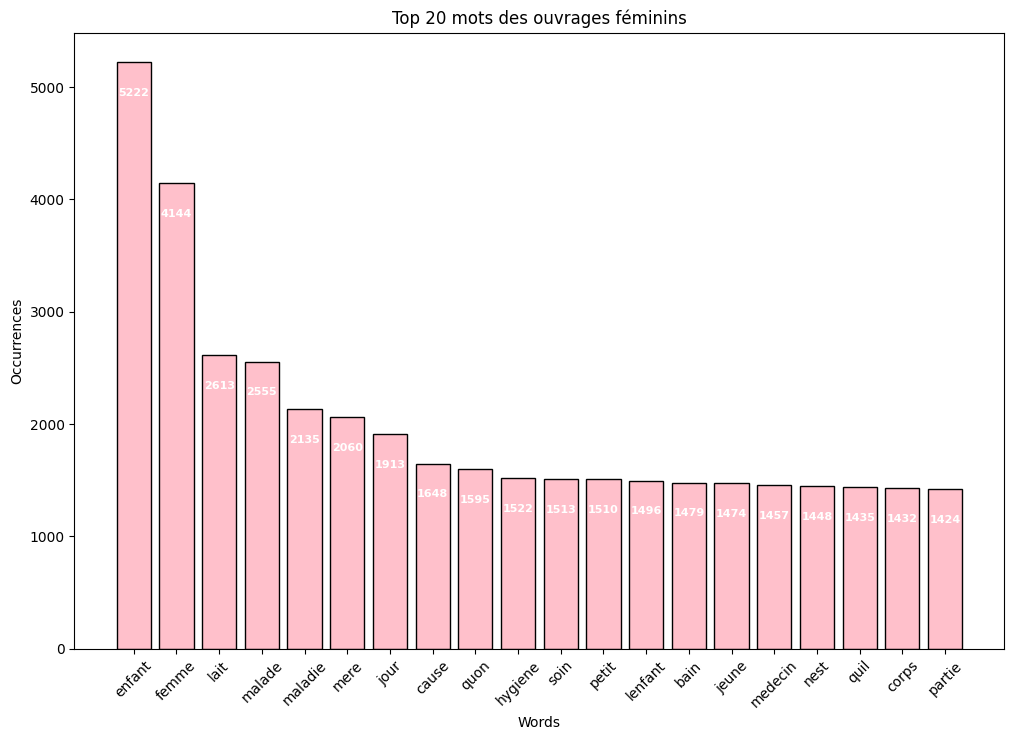

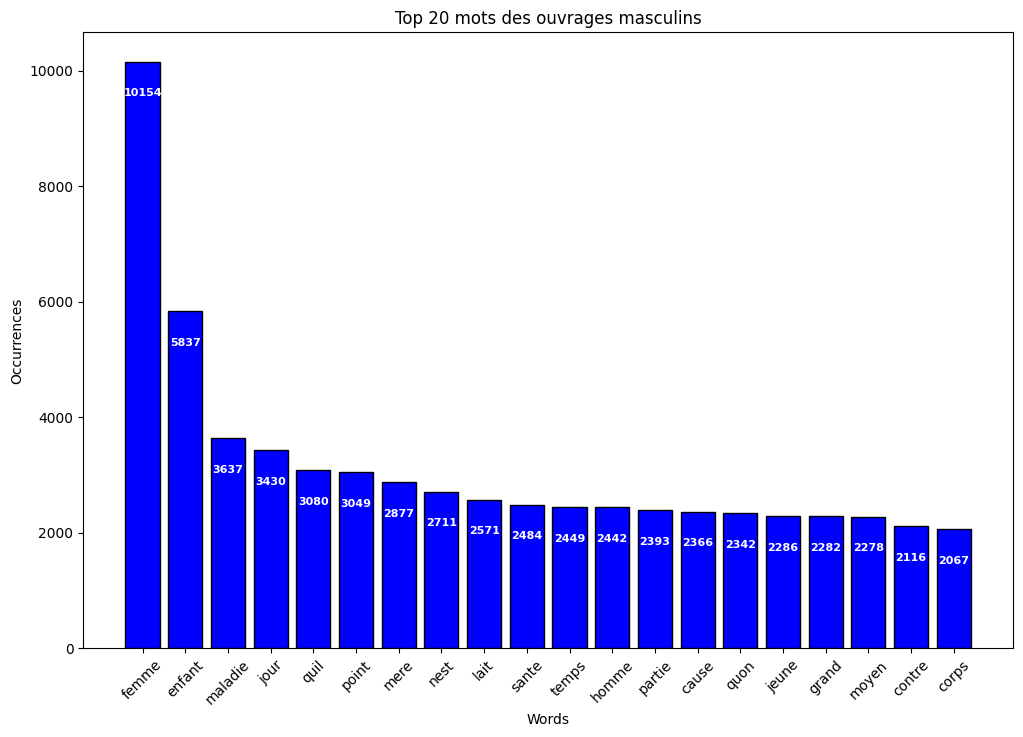

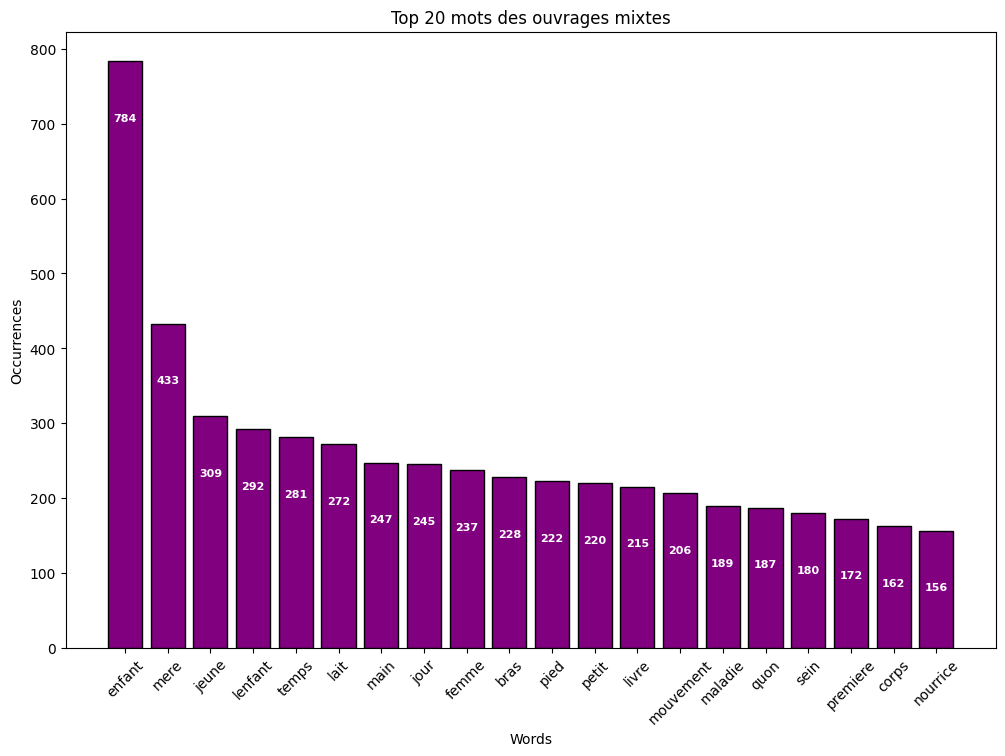

In [18]:
import matplotlib.pyplot as plt

def plot_top_20_words(df, title, x, color):
    top_20_words = df.head(20)
    plt.figure(figsize=(12, 8))
    for index, row in top_20_words.iterrows():
        plt.text(index, row['Occurences'] - x, round(row['Occurences'], 1), color='white', ha="center", fontsize=8, fontweight='bold')
    plt.bar(top_20_words['Mot'], top_20_words['Occurences'], color=color, edgecolor='black', linewidth=1)
    plt.xlabel('Words')
    plt.ylabel('Occurrences')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plotting the top 20 words for each category
plot_top_20_words(df_femmes, 'Top 20 mots des ouvrages féminins', 300, 'pink')
plot_top_20_words(df_hommes, 'Top 20 mots des ouvrages masculins', 600, 'blue')
plot_top_20_words(df_mixte, 'Top 20 mots des ouvrages mixtes', 80, 'purple')